In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import joblib

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.utils.class_weight import compute_class_weight


In [2]:
df = pd.read_csv("/workspaces/Final_Project_DataScient/data/16var_origin.csv")
df

,_MENT14D,DECIDE,SEXVAR,SDHISOLT,_AGEG5YR,_DRDXAR2,LSATISFY,_EDUCAG,SLEPTIM1,EMPLOY1,_PHYS14D,_BMI5CAT,MARITAL,_AIDTST4,_ASTHMS1,_INCOMG1,ADDEPEV3
0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,2.0,6.0,2.0,1.0,2.0,2.0,0.0,3.0,3.0,0.0
1,1.0,0.0,1.0,1.0,8.0,0.0,1.0,4.0,5.0,7.0,2.0,2.0,0.0,0.0,3.0,6.0,0.0
2,0.0,0.0,1.0,1.0,14.0,1.0,0.0,2.0,7.0,7.0,1.0,1.0,0.0,0.0,1.0,9.0,0.0
3,0.0,0.0,1.0,0.0,5.0,0.0,0.0,3.0,9.0,5.0,2.0,1.0,0.0,0.0,3.0,3.0,0.0
4,0.0,0.0,0.0,0.0,13.0,0.0,1.0,2.0,7.0,7.0,2.0,2.0,0.0,0.0,3.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211840,1.0,0.0,1.0,1.0,2.0,0.0,2.0,4.0,7.0,1.0,1.0,1.0,4.0,0.0,3.0,2.0,1.0
211841,2.0,0.0,0.0,0.0,10.0,1.0,1.0,4.0,7.0,1.0,1.0,2.0,0.0,1.0,3.0,6.0,0.0
211842,1.0,0.0,1.0,0.0,7.0,0.0,0.0,4.0,7.0,1.0,2.0,2.0,0.0,1.0,3.0,5.0,0.0
211843,0.0,0.0,0.0,0.0,11.0,0.0,0.0,3.0,5.0,7.0,1.0,3.0,0.0,1.0,2.0,5.0,0.0


In [3]:
df["_AGEG5YR"] = df["_AGEG5YR"] - 1 
df.loc[df["_AGEG5YR"] ==  13, "_AGEG5YR"] = -1
df['_AGEG5YR'].value_counts()

_AGEG5YR
 9.0     23511
 8.0     21958
 10.0    21912
 7.0     18084
 12.0    17254
 11.0    16324
 6.0     16212
 4.0     14508
 5.0     13830
 3.0     13415
 0.0     11688
 2.0     11495
 1.0      9729
-1.0      1925
Name: count, dtype: int64

In [4]:
columnas = df.columns
columnas
for col in columnas:
    df = df[df[col] != -1]

In [5]:
df['_AGEG5YR'].value_counts()

_AGEG5YR
9.0     23511
8.0     21958
10.0    21912
7.0     18084
12.0    17254
11.0    16324
6.0     16212
4.0     14508
5.0     13830
3.0     13415
0.0     11688
2.0     11495
1.0      9729
Name: count, dtype: int64

In [6]:
X = df.drop("ADDEPEV3", axis=1)
y = df["ADDEPEV3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
# Cálculo de pesos de clases
# ------------------------------------------------------------------------------
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
print("Pesos de clases :", class_weights)


Pesos de clases : {0.0: 0.6345684423720744, 1.0: 2.3577906944093447}


In [8]:
def show_metrics(y_test, y_pred_test, y_train, y_pred_train):    
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1_score_test = f1_score(y_test, y_pred_test)
    f1_score_train = f1_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)

    print("\nRESULTADOS DEL MODELO")
    print("=" * 50)
    print(f"{'Métrica':<15} {'Test':<10} {'Train':<10}")
    print("-" * 50)
    print(f"{'Accuracy':<15} {accuracy_test:<10.2f} {accuracy_train:<10.2f}")
    print(f"{'F1 Score':<15} {f1_score_test:<10.2f} {f1_score_train:<10.2f}")
    print(f"{'Precision':<15} {precision_test:<10.2f} {precision_train:<10.2f}")
    print(f"{'Recall':<15} {recall_test:<10.2f} {recall_train:<10.2f}")
    print("=" * 50)


    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)

    # Graph the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.title('Matriz de Confusión')
    plt.show()

In [9]:
# param_grid = {
#     'learning_rate': [0.01, 0.03, 0.04, 0.06, 0.1],
#     'depth': [4, 6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9],
#     'iterations': [100, 300, 500],
# }

# cat_model = CatBoostClassifier(
#     custom_metric=['Precision'], 
#     early_stopping_rounds=20,
#     verbose=0,
#     random_state=42,
#     class_weights=class_weights
# )

# grid_search = GridSearchCV(
#     estimator=cat_model,
#     param_grid=param_grid,
#     scoring='f1',
#     cv=3,
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)

# # Resultados
# print(f"Mejores Parámetros: {grid_search.best_params_}")
# print(f"Mejor F1 alcanzado: {grid_search.best_score_:.3f}")


In [10]:
initial_catboost = CatBoostClassifier(
    learning_rate=0.044,
    l2_leaf_reg=3,
    iterations=300,
    depth=6,
    custom_metric=['Precision'],
    early_stopping_rounds=20,
    verbose=0,
    random_state=42,
    class_weights=class_weights
)

initial_catboost.fit(X_train, y_train)


RESULTADOS DEL MODELO
Métrica         Test       Train     
--------------------------------------------------
Accuracy        0.78       0.78      
F1 Score        0.58       0.58      
Precision       0.49       0.50      
Recall          0.70       0.71      


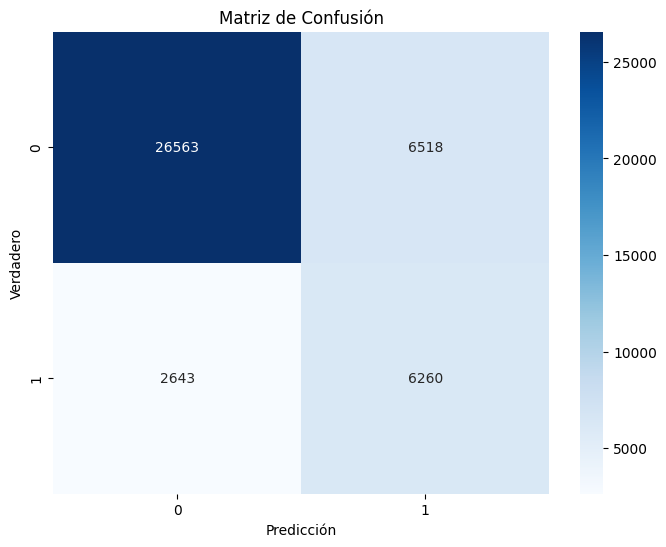

In [11]:
y_pred_test = initial_catboost.predict_proba(X_test)[:, 1]
y_pred_train = initial_catboost.predict_proba(X_train)[:, 1]

threshold = 0.54
y_pred_test_threshold = (y_pred_test >= threshold).astype(int)
y_pred_train_threshold = (y_pred_train >= threshold).astype(int)

show_metrics(y_test, y_pred_test_threshold, y_train, y_pred_train_threshold)

In [12]:
importancia = initial_catboost.get_feature_importance()
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Crear un DataFrame para organizarlo
importancia_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importancia
}).sort_values(by='Importance', ascending=False)

print(importancia_df)

     Feature  Importance
0   _MENT14D   31.837871
1     DECIDE   13.722796
2     SEXVAR    8.428352
3   SDHISOLT    6.210751
4   _AGEG5YR    5.429331
5   _DRDXAR2    4.977604
6   LSATISFY    4.598129
14  _ASTHMS1    3.496781
8   SLEPTIM1    3.235664
13  _AIDTST4    3.212160
9    EMPLOY1    2.959915
10  _PHYS14D    2.786083
12   MARITAL    2.694697
7    _EDUCAG    2.519934
11  _BMI5CAT    2.519759
15  _INCOMG1    1.370173


In [13]:
# Tomamos todas las variables con importancia por encima del 2%
variables_importantes = [
    "SEXVAR","_AGEG5YR", "_EDUCAG", "EMPLOY1", "MARITAL", "_MENT14D", "_BMI5CAT",
    "_INCOMG1", "SLEPTIM1", "DECIDE", "SDHISOLT", "_DRDXAR2", "LSATISFY",
    "_PHYS14D", "_AIDTST4", "_ASTHMS1"
]


In [14]:
X_train_imp = X_train[variables_importantes]
X_test_imp = X_test[variables_importantes]

In [15]:
final_catboost = CatBoostClassifier(
    learning_rate=0.044,
    l2_leaf_reg=3,
    iterations=300,
    depth=6,
    custom_metric=['Precision'],
    early_stopping_rounds=20,
    verbose=0,
    random_state=42,
    class_weights=class_weights
)

final_catboost.fit(X_train_imp, y_train)


RESULTADOS DEL MODELO
Métrica         Test       Train     
--------------------------------------------------
Accuracy        0.78       0.78      
F1 Score        0.58       0.58      
Precision       0.49       0.49      
Recall          0.70       0.71      


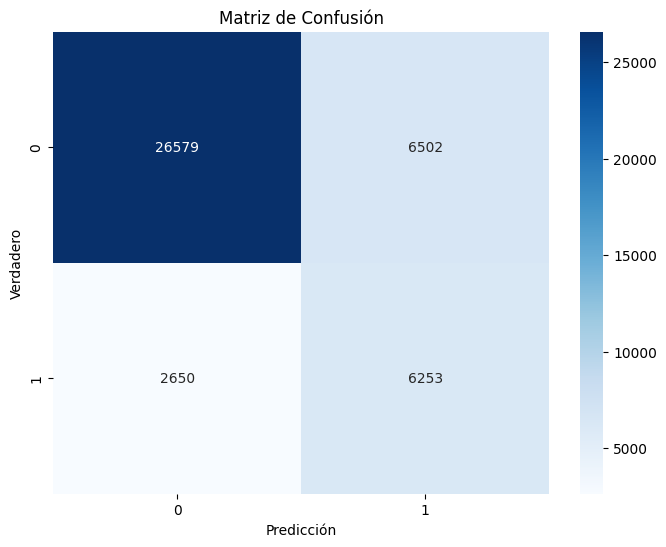

In [16]:
y_pred_test = final_catboost.predict_proba(X_test_imp)[:, 1]
y_pred_train = final_catboost.predict_proba(X_train_imp)[:, 1]

threshold = 0.54
y_pred_test_threshold = (y_pred_test >= threshold).astype(int)
y_pred_train_threshold = (y_pred_train >= threshold).astype(int)

show_metrics(y_test, y_pred_test_threshold, y_train, y_pred_train_threshold)

In [17]:
X_test_imp.columns

Index(['SEXVAR', '_AGEG5YR', '_EDUCAG', 'EMPLOY1', 'MARITAL', '_MENT14D',
       '_BMI5CAT', '_INCOMG1', 'SLEPTIM1', 'DECIDE', 'SDHISOLT', '_DRDXAR2',
       'LSATISFY', '_PHYS14D', '_AIDTST4', '_ASTHMS1'],
      dtype='object')

In [18]:
# Guardar el modelo entrenado en la carpeta models/
joblib.dump(final_catboost, "../models/modelo_catboost.pkl")

['../models/modelo_catboost.pkl']

In [19]:
# Prediccion de dato nuevo
new_data = [0, 0, 1, 0, 8, 0, 0, 3, 6, 0, 0, 1, 0, 0, 3, 4]

y_pred_new = final_catboost.predict_proba([new_data])[:, 1]

threshold = 0.54
y_pred_new_threshold = (y_pred_new >= threshold).astype(int)

y_pred_new_threshold

array([0])

### ✅ Resultado Final del Modelo

| Métrica    | Test  | Train |
|-------------|------|------|
| **Accuracy**  | 0.78 | 0.79 |
| **F1 Score**  | 0.57 | 0.59 |
| **Precision** | 0.48 | 0.50 |
| **Recall**    | 0.70 | 0.72 |

### 🎯 Conclusión
El modelo final alcanzó métricas similares a otras alternativas analizadas en la fase previa.  
Se prefiere este modelo por:

- Su **simplicidad** en comparación con otros modelos más complejos.  
- El menor número de **features** utilizado, lo que contribuye a una **mejor generalización** y facilita la interpretabilidad en un contexto médico.  
- La **casi nula presencia de overfitting**, evidenciada por la pequeña diferencia entre los resultados de train y test.
